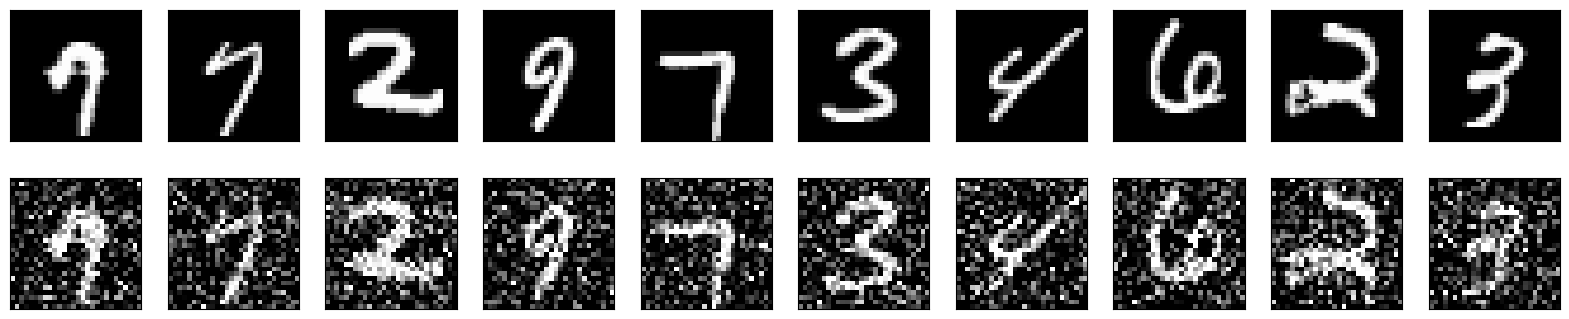

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 8)              │        43,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        83,905 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,817 (499.29 KB)

 Trainable params: 127,817 (499.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7970 - loss: 0.2889 - val_accuracy: 0.8058 - val_loss: 0.1321
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8069 - loss: 0.1298 - val_accuracy: 0.8073 - val_loss: 0.1219
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8089 - loss: 0.1218 - val_accuracy: 0.8086 - val_loss: 0.1183
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8088 - loss: 0.1189 - val_accuracy: 0.8094 - val_loss: 0.1170
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8101 - loss: 0.1161 - val_accuracy: 0.8091 - val_loss: 0.1147
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8104 - loss: 0.1144 - val_accuracy: 0.8096 - val_loss: 0.1134
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8104 - loss: 0.1136 - val_accuracy: 0.8096 - val_loss: 0.1128
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8108 - loss: 0.1125 - val_accuracy: 

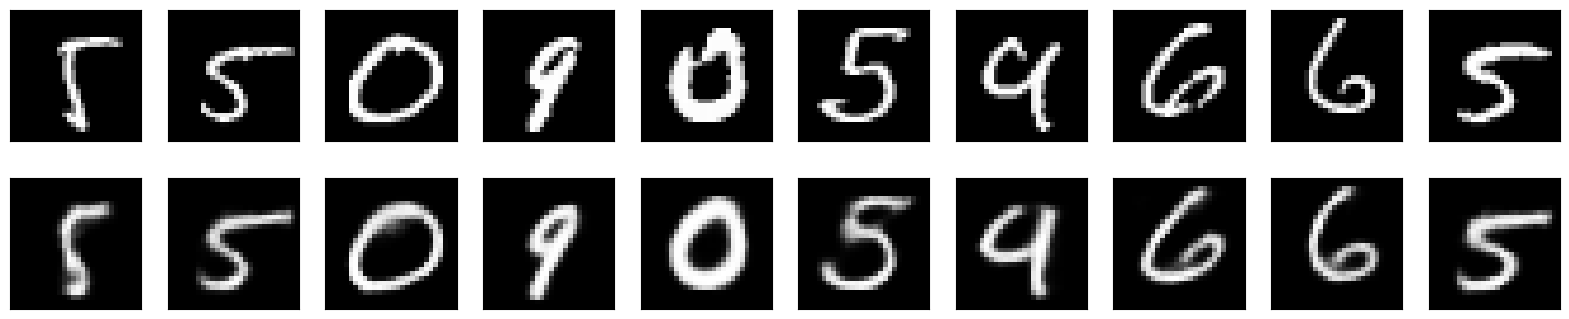

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8050 - loss: 0.1448 - val_accuracy: 0.8085 - val_loss: 0.1213
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8091 - loss: 0.1199 - val_accuracy: 0.8090 - val_loss: 0.1191
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8099 - loss: 0.1178 - val_accuracy: 0.8093 - val_loss: 0.1182
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8102 - loss: 0.1166 - val_accuracy: 0.8088 - val_loss: 0.1177
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8105 - loss: 0.1160 - val_accuracy: 0.8083 - val_loss: 0.1178
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8105 - loss: 0.1154 - val_accuracy: 0.8091 - val_loss: 0.1171
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8103 - loss: 0.1151 - val_accuracy: 0.8092 - val_loss: 0.1165
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8104 - loss: 0.1146 - val_accu

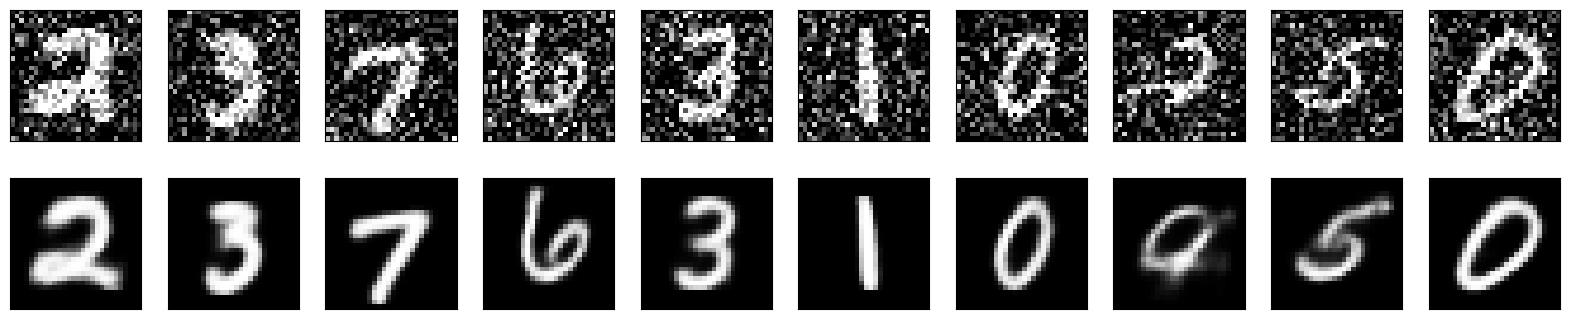

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets import mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


"""
## Prepare the data
"""

# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

"""
## Build the autoencoder

We are going to use the Functional API to build our convolutional autoencoder.
"""
z_dim = 8
# --- Encoder ---
input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)  # Now shape: (7, 7, 64)
x = layers.Flatten()(x)
z = layers.Dense(z_dim, name="latent_vector")(x)  # Latent space: (None, 2)

encoder = Model(input, z, name="encoder")

# --- Decoder ---
latent_inputs = layers.Input(shape=(z_dim,))

# Upsample latent vector back to (7, 7, 64)
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
output_img = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

decoder = Model(latent_inputs, output_img, name="decoder")

# Autoencoder
autoencoder_input = input
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)

# Combine into full autoencoder
autoencoder = Model(inputs=autoencoder_input, outputs=decoded, name="autoencoder")


autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] )
autoencoder.summary()

"""
Now we can train our autoencoder using `train_data` as both our input data
and target. Notice we are setting up the validation data using the same
format.
"""

autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

"""
Let's predict on our test dataset and display the original image together with
the prediction from our autoencoder.

Notice how the predictions are pretty close to the original images, although
not quite the same.
"""

predictions = autoencoder.predict(test_data)
display(test_data, predictions)

"""
Now that we know that our autoencoder works, let's retrain it using the noisy
data as our input and the clean data as our target. We want our autoencoder to
learn how to denoise the images.
"""

autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

"""
Let's now predict on the noisy data and display the results of our autoencoder.

Notice how the autoencoder does an amazing job at removing the noise from the
input images.
"""

predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)


z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
z_sample shape: (1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
z_sample shape: (1, 8)


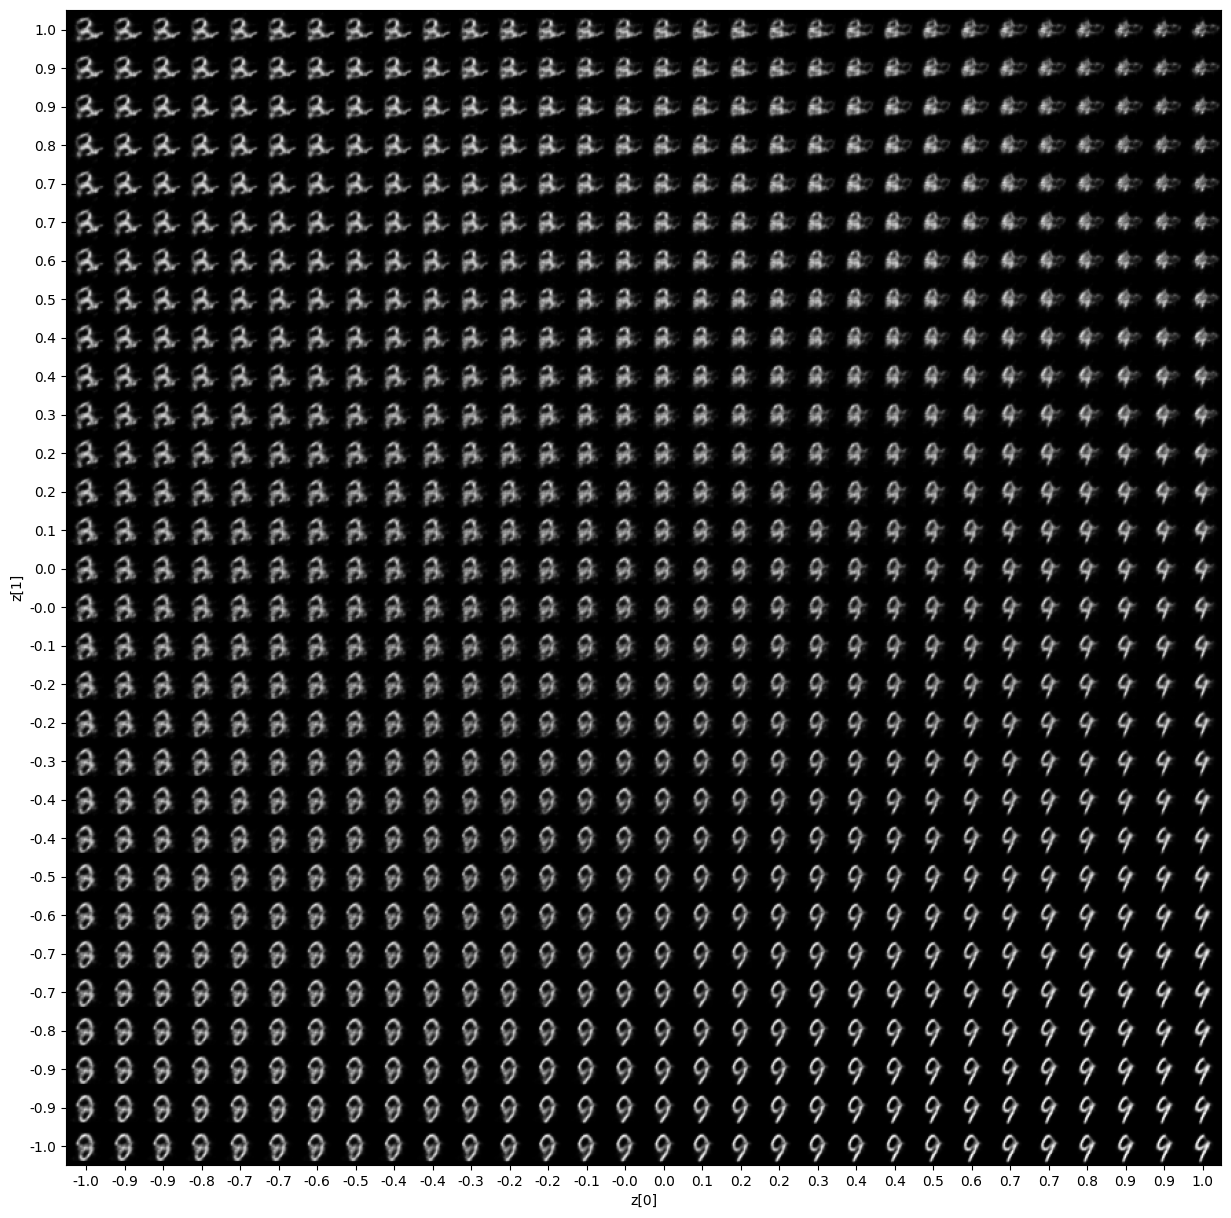

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


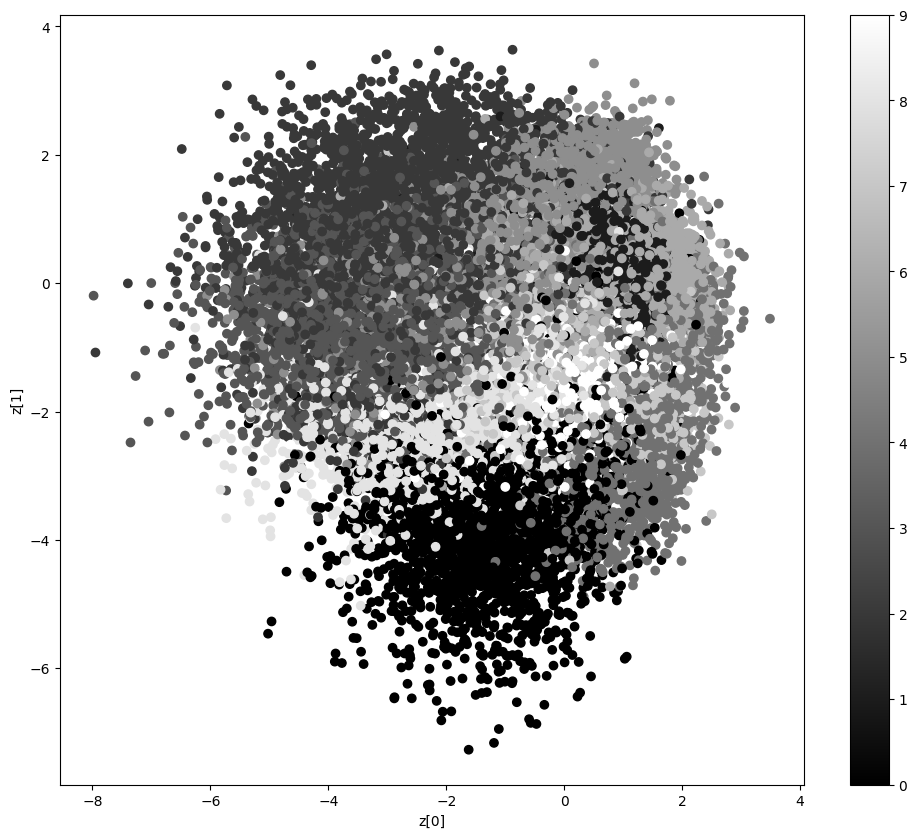

In [16]:

"""
## Display a grid of sampled digits
"""

import matplotlib.pyplot as plt
import keras


def plot_latent_space(decoder, n=30, figsize=15, z_dim=8):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            a = np.array([xi, yi ])
            b = [0] * (z_dim - 2)

            z_sample =  np.concatenate((a, b))  #np.array([[xi, yi ]])
            z_sample = np.expand_dims(z_sample, axis=0)  # Now shape is (1, 8)
            print("z_sample shape:", z_sample.shape)
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(decoder, z_dim=z_dim)

"""
## Display how the latent space clusters different digit classes
"""


def plot_label_clusters(encoder, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(encoder, x_train, y_train)

In [10]:
import numpy as np

a = np.array([1, 1])  # Assume xi and yi are scalars
b = [0] * (z_dim - 2)    # Pad with zeros
z_sample = np.array([np.concatenate((a, b))])  # Shape: (1, z_dim)
print(z_sample)


[[1 1 0 0 0 0 0 0]]
